## **OCR with Pytesseract and OpenCV**

In [1]:
!sudo apt install tesseract-ocr libtesseract-dev
!pip -q install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 49 not upgraded.
Need to get 8,560 kB of archives.
After this operation, 31.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.1 [582 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtesseract-dev amd64 4.1.1-2.1build1 [1,600 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:5 http://arc

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
im1 = '/content/drive/My Drive/Computer vision/Asg 1/P/CV.jpg'

In [4]:
import cv2
import pytesseract

image = cv2.imread(im1)

# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(im1, config=custom_config)

'S Lingnan #% eal K a EDUCATION ferSERVICE\nProjecti h ; d f TEREDEA - IBGE\nUses of projective geometry ee\n— Drawing FS\nb= Sep\n— Measurements ee\n— Mathematics for projection WSS Se Ty 4\neee Sli\n— Undistorting images So eee eC\nS ee ae\n— Camera pose estimation oe ae ae\n— Object recognition Lo ie a\n06/10/2024 : fe Se a\n0 ee\nSee\n——eE——E————————\nPaolo Uccello\n\x0c'

# **Preprocessing for Tesseract**

In [5]:
import cv2
import numpy as np

image = cv2.imread(im1)

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

In [6]:
image = cv2.imread(im1)

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

In [7]:
# this is only for google colab, the original is cv2.imshow()
from google.colab.patches import cv2_imshow

# **results of OCR with preprocessing**

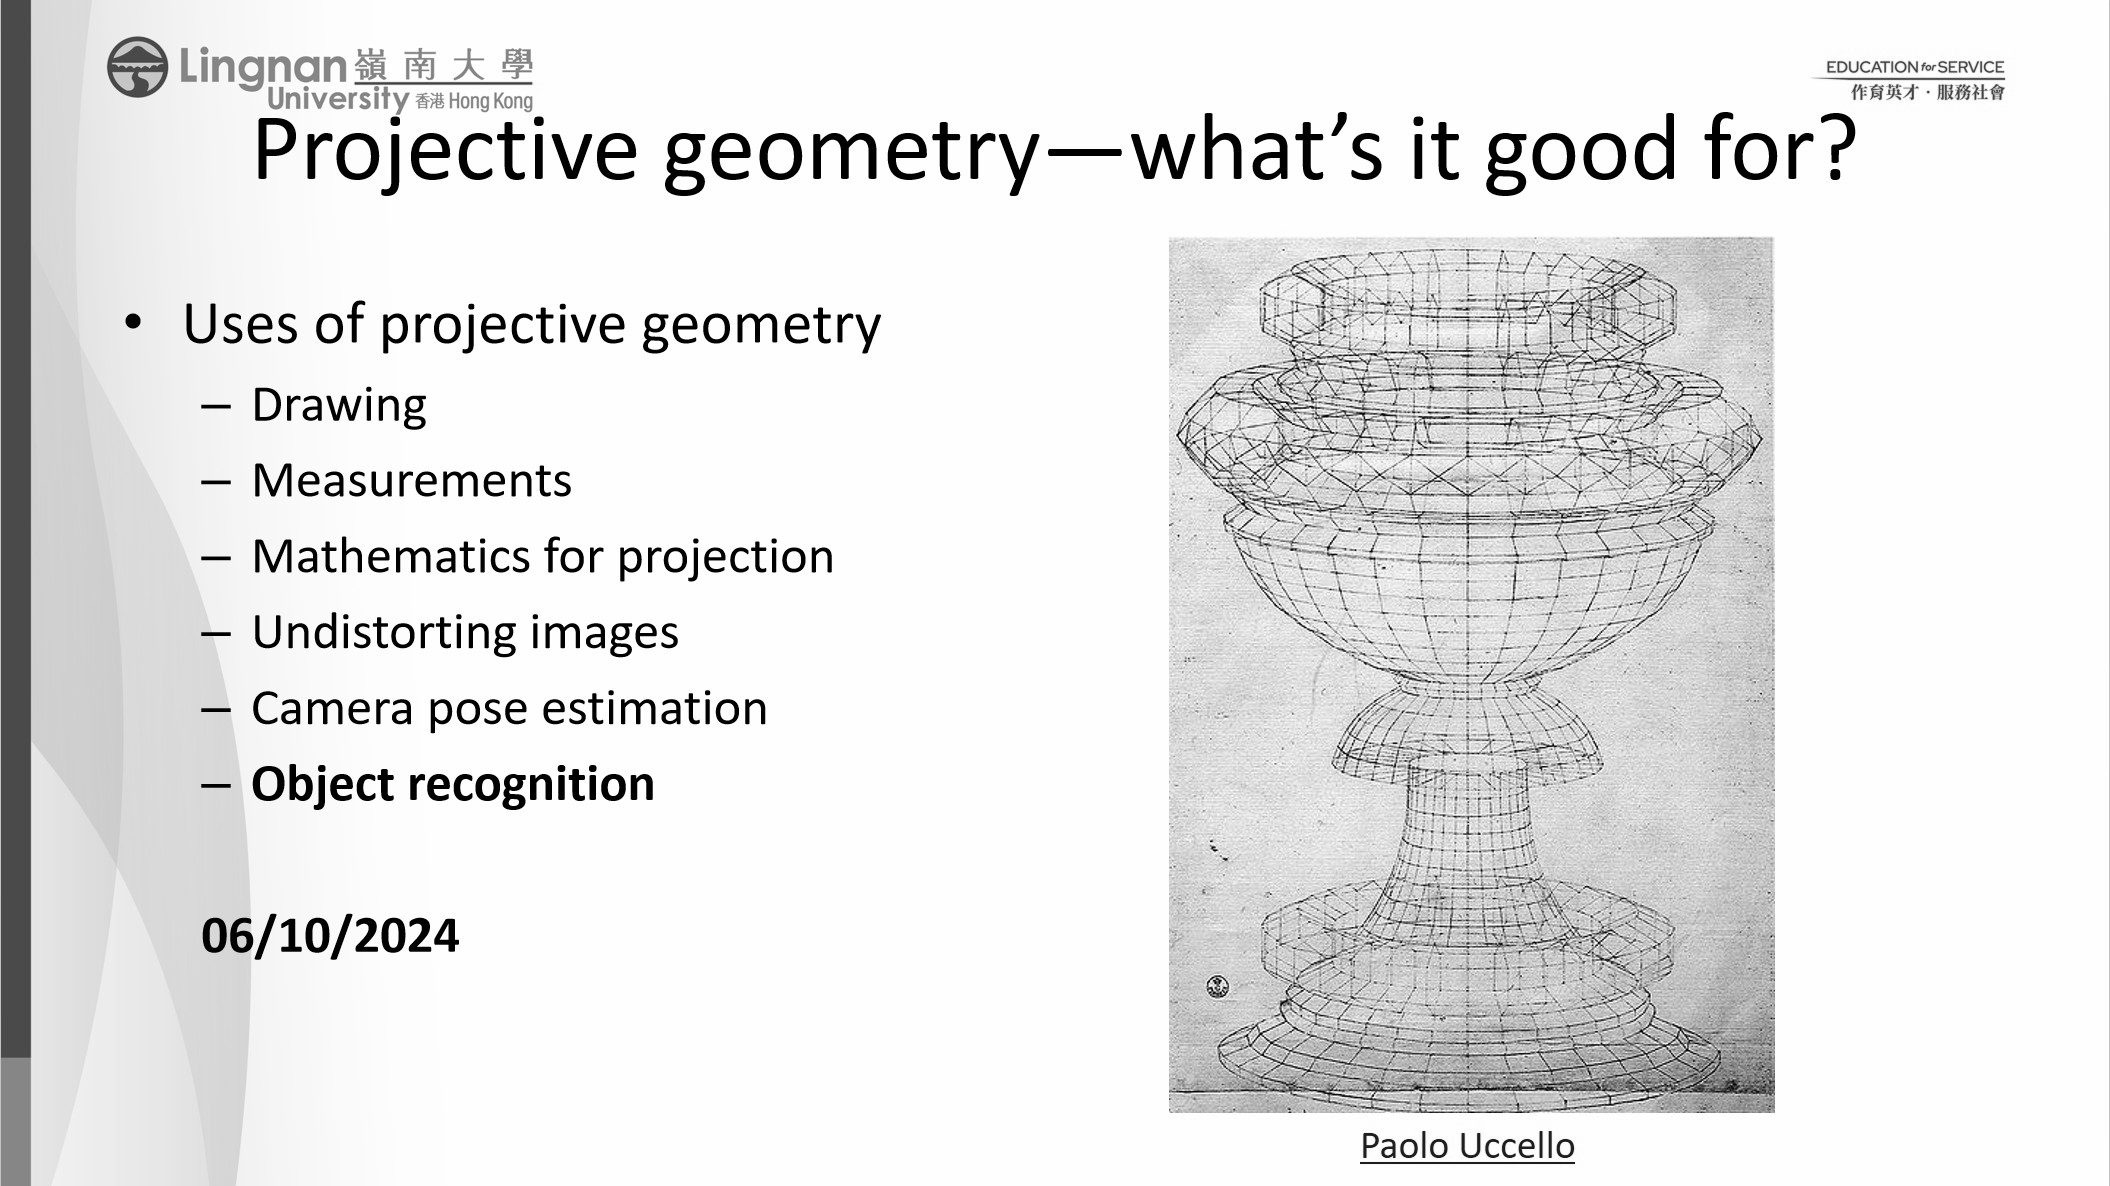

'S Lingnan Ea K a ee\nUniversity #8 Hong Kong ; . TERE DEA - IRBBRES\nProjective geometry—what’s it good for?\n= AS ESAS - 5\n¢ Uses of projective geometry ee at cy\n— Drawing ce oo ae\nRK a SS Ss 5 ee et PY\n— Measurements Ss See\n— Mathematics for projection ee ay =\nSa se ee LISI. :\n— Undistorting images Sat pee\na DSSS Eee Ss\nCamera pose estimation fio\n— Object recognition oa -\npe |\n(Se\nPaolo Uccello\n\x0c'

In [8]:
img = gray
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

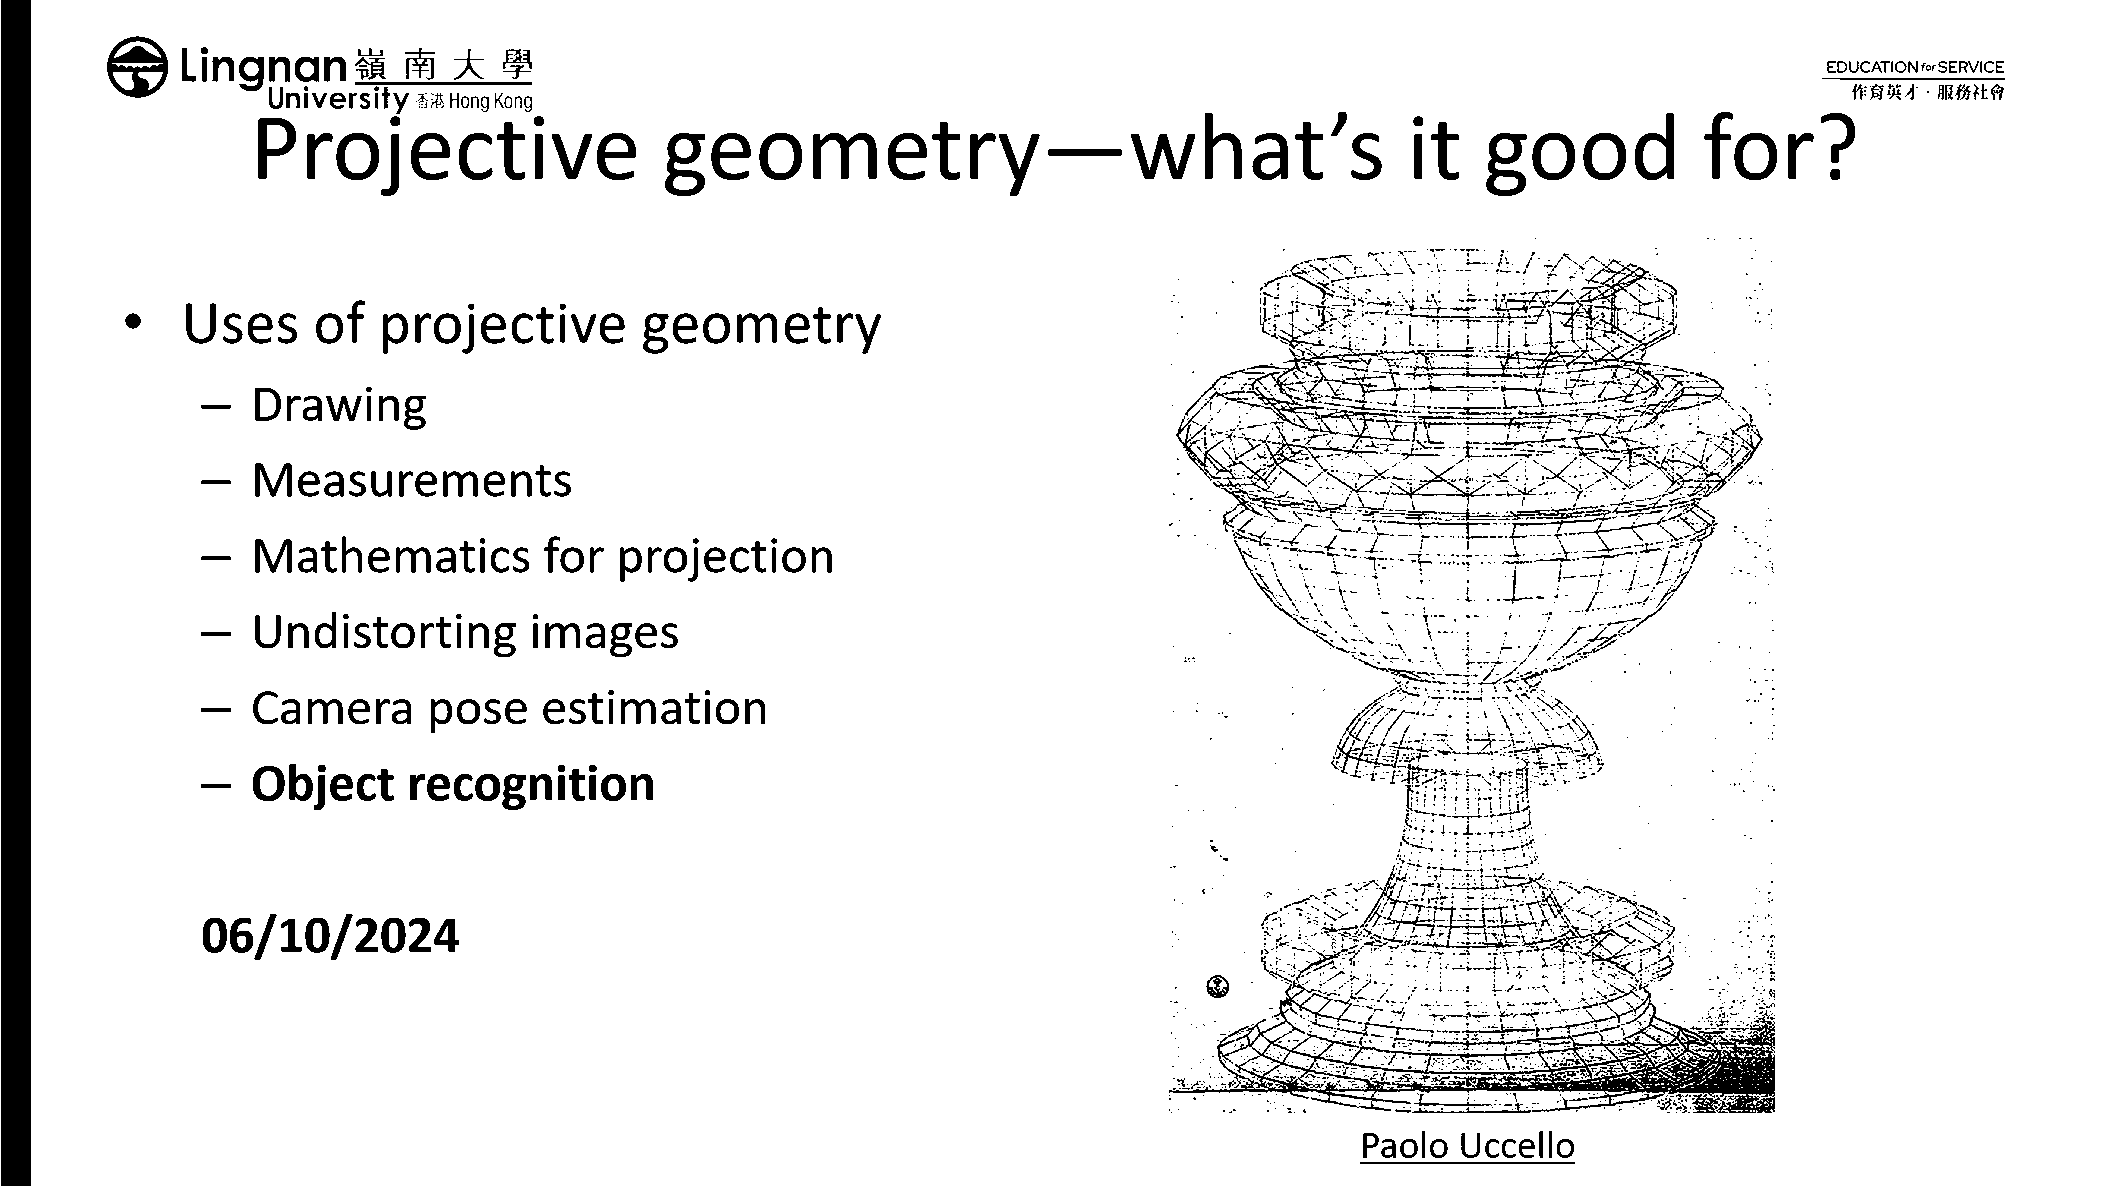

'eS Lingnan #4 (eal K AA EDUCATION fr SERVICE\nUniversity ‘ra Hong Kong , . TERIA - ERE\nProjective geometry—what’s it good for?\n_ ne EBS sp a .\n* Uses of projective geometry ieee ote oan\n— Drawing gs eee oe\nEK a Bes AGS Poe ee copy\n— Measurements eS} See\n— Mathematics for projection YEE ey *s\nNoes atte, [tf .\n— Undistorting images Seca GY fg\n“ NR eer o\nCamera pose estimation fir SS\n— Object recognition ee aan\naannee :\nOg anni heb s See\nPaolo Uccello\n\x0c'

In [9]:
img = thresh
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

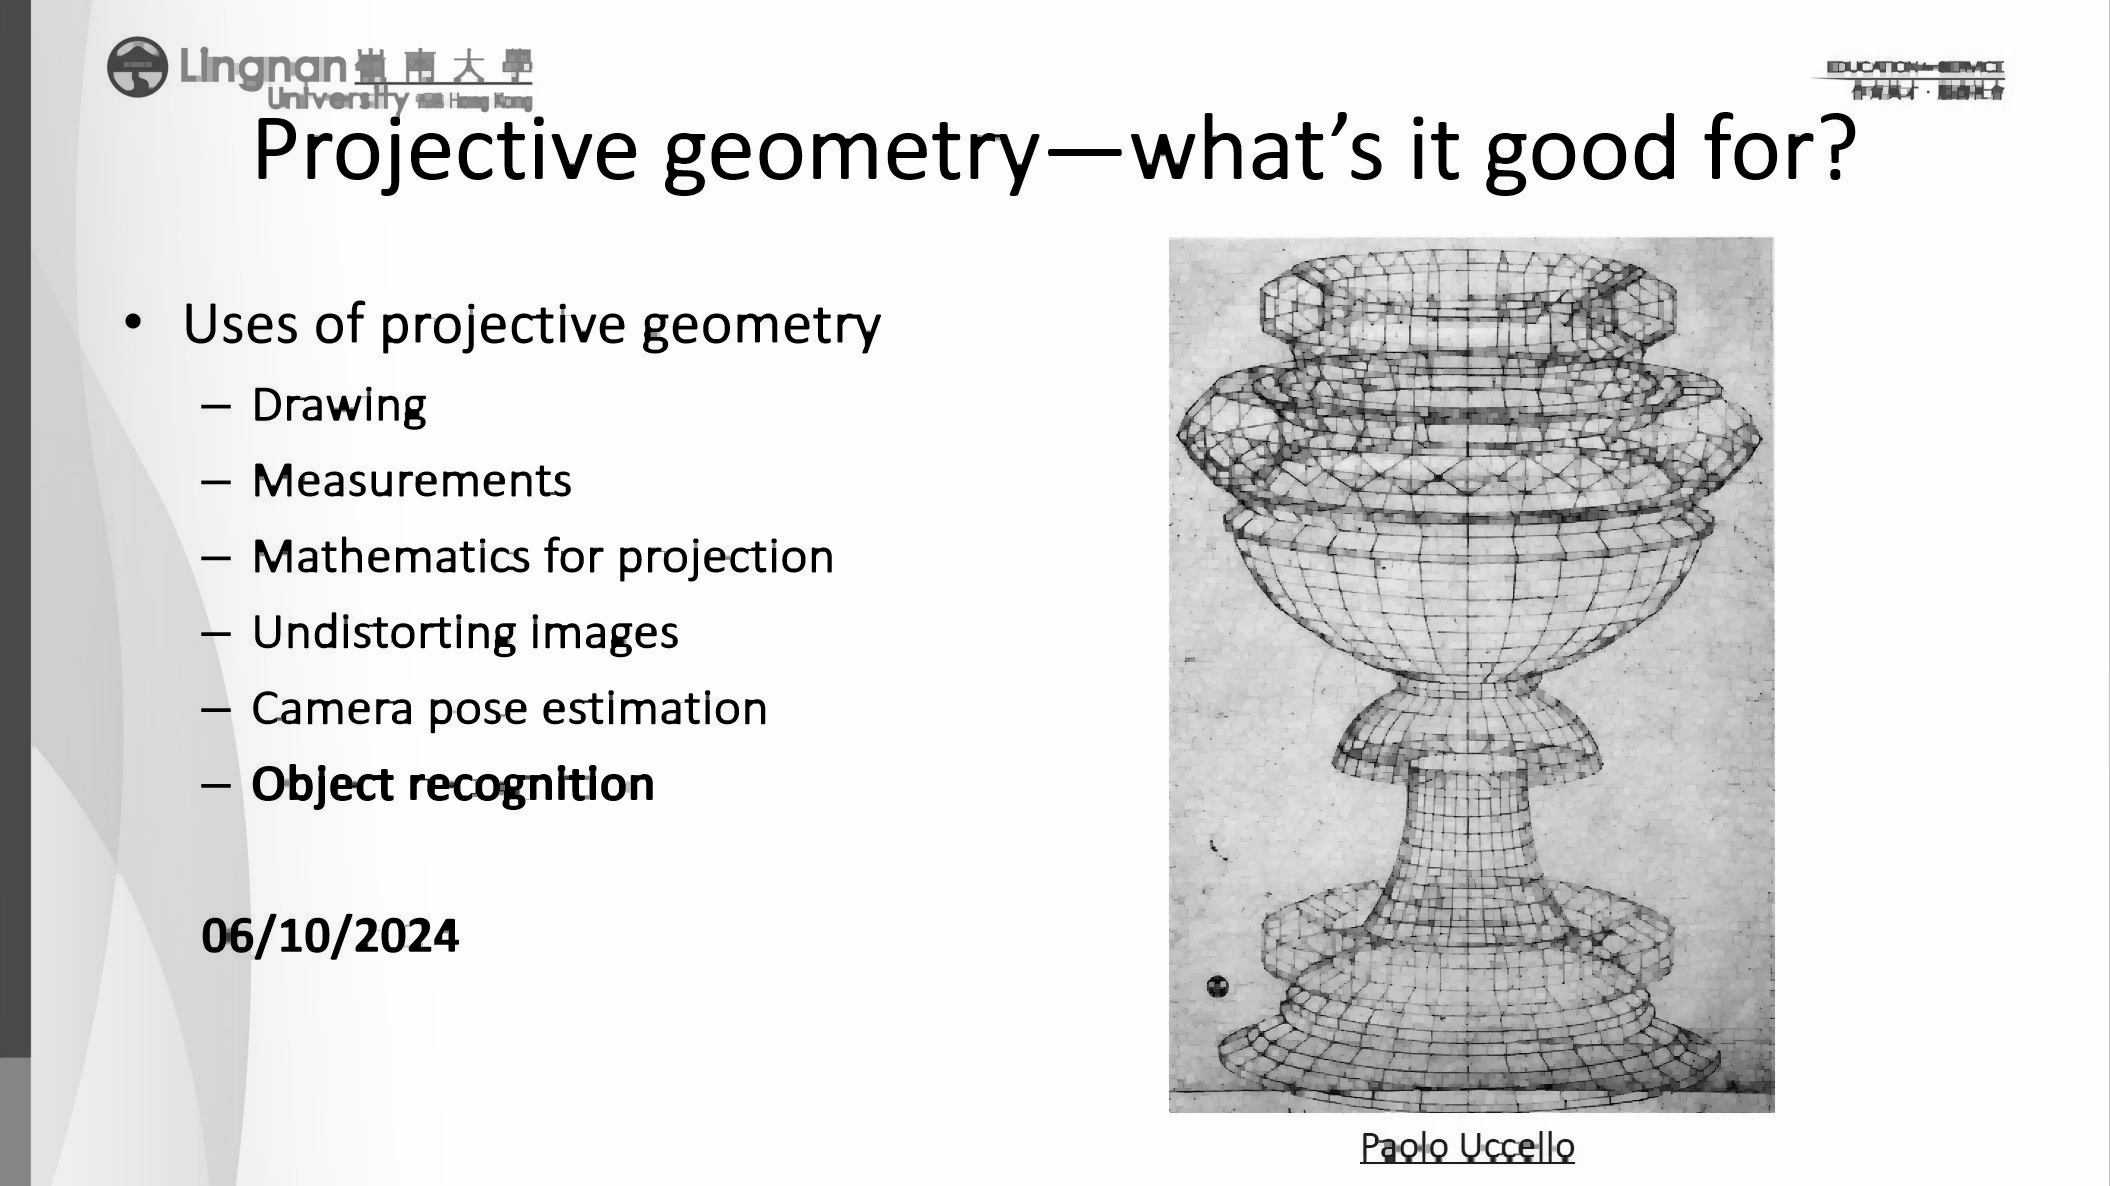

"@uingnen sy Az _ Saree\nProjective geometry—what’s it good for?\noo Sl ie\n* Uses of projective geometry CC 7FS ee\nEE Ee\n— Drawing cope ces oa\n— Measurements Rit Sense ee\nbE Se eT a\n— Mathematics for projection s ey “y\noat a ee ~\n— Undistorting images : ess bee a\nwe ier re es\n— Camera pose estimation sae | Oi :\n— Object recognition “ » a\n' + : iu 3 br\noS yi lt\n06/10/2024 r tS)\nPaolo Uccello\n\x0c"

In [10]:
img = opening
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

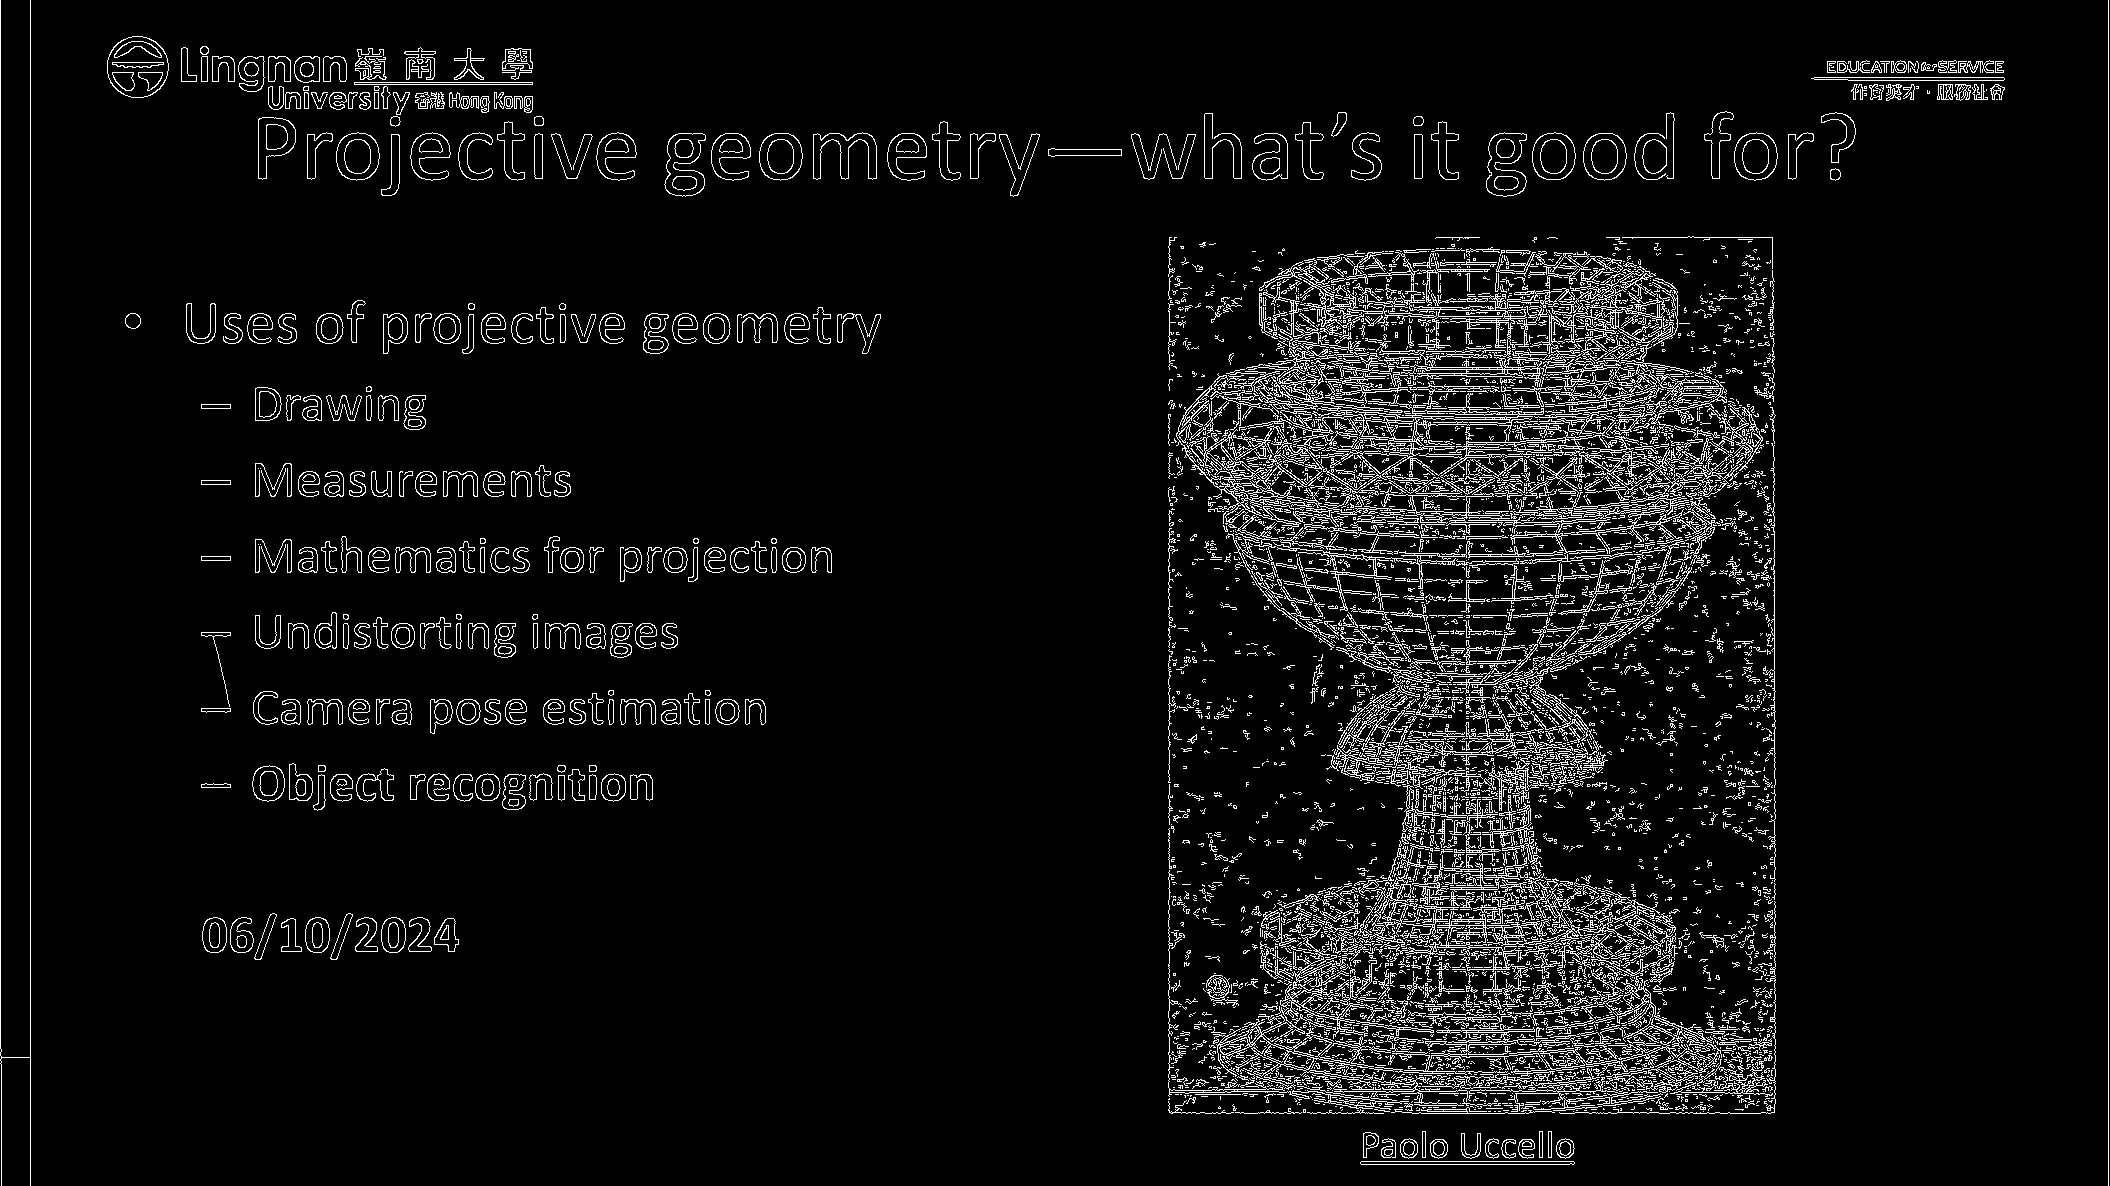

'IIIa) ENN: ie EDUCATION SERVICE\nUniversity 2 tong Kong nal\no is} p °\nProjective geometry—wnhat’s it good tor?\n\n° ° ee Ae oe eee eo ees\n\nc Uses of projective geometry a Lo cursens oe\n\n— Drawing 0 areas\n\nSe ee iecrennt he ee\n\n— Mathematics for projection eo ccccss ss Se\n\ni Undistorting images be Basse ae\n\n— Camera pose estimation ne ae ee\n\n~ Object recognition xe. a Be ao\n\neee i Gems\n\nSa eee\n\n06/10/2026 * oe\n\na pay cereeret ae\n\nPaolo Uccello\n\x0c'

In [11]:
img = canny
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

# **keys**

In [12]:
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread(im1)

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())


dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


# **Getting boxes around text**

In [13]:
import cv2
import pytesseract

img = cv2.imread(im1)

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow( img)
cv2.waitKey(0)


Output hidden; open in https://colab.research.google.com to view.

# **Getting boxes around text words**

In [14]:
img = cv2.imread(im1)

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)



Output hidden; open in https://colab.research.google.com to view.

# **Text template matching**

In [15]:
import re
import cv2
import pytesseract
from pytesseract import Output


img = cv2.imread(im1)

d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	if re.match(date_pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow( img)
cv2.waitKey(0)

Output hidden; open in https://colab.research.google.com to view.

# **Custom detection, only numbers**

In [16]:
img = cv2.imread(im1)

custom_config = r'--oem 3 --psm 6 outputbase digits'
print(pytesseract.image_to_string(img, config=custom_config))

-
6
- 4
.
- 2
06102024 2
0



# **Blacklisting characters**

In [17]:
custom_config = r'-c tessedit_char_blacklist=0123456789 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'S Lingnan eal K a EDUCATION ferSERVICE\nProjecti h ; d f TERE DEA - MBER\nUses of projective geometry Se\n— Drawing FS\nC= SS Se\n— Measurements eee\n— Mathematics for projection WSS Se Tidy Sy\neee Sli\n— Undistorting images So eee ei\nS ne ee\n— Camera pose estimation oe a ae\n— Object recognition Lo ie\n€// : (fe Se\noe\nSee\n———e———————e—\nPaolo Uccello\n\x0c'

# **Script, run in loop for read pages**

In [18]:
img = cv2.imread(im1)

def read_text_from_image(image):
  """Reads text from an image file and outputs found text to text file"""
  # Convert the image to grayscale
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Perform OTSU Threshold
  ret, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

  rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

  dilation = cv2.dilate(thresh, rect_kernel, iterations = 1)

  contours, hierachy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  image_copy = image.copy()

  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    cropped = image_copy[y : y + h, x : x + w]

    file = open("results.txt", "a")

    text = pytesseract.image_to_string(cropped)

    file.write(text)
    file.write("\n")

  file.close()

In [19]:
image = cv2.imread(im1)
read_text_from_image(image)

# OCR results
cv2_imshow(image)
f = open("results.txt", "r")
lines = f.readlines()
lines.reverse()
for line in lines:
    print(line)
f.close()

Output hidden; open in https://colab.research.google.com to view.